1) The mirror points $z_1$ and $z_2$ are computed using the fact that the $v_{||}$ is $0$ at the extremities. Setting the velocity to zero and after a few analytic and algebraic steps, one arrives at the following:
$$z = \pm L \sqrt{\frac{1}{\varepsilon}\left (\frac{E}{\mu B_0}-1\right)}$$

/var/folders/xq/6np0k8fs4tz9n8zx56mg1nkw0000gn/T/ipykernel_28476/3180067322.py:26: RuntimeWarning: divide by zero encountered in divide
  return 1 / (v_par)


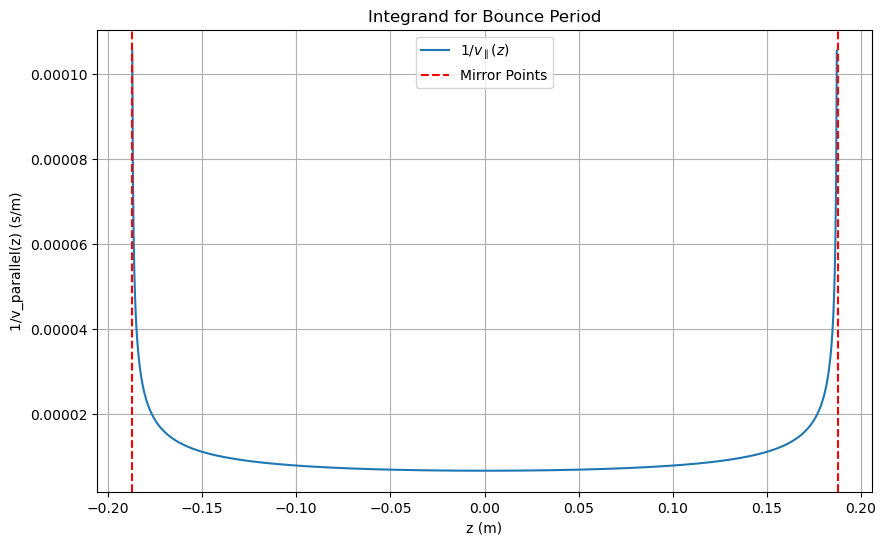

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m = 9.11e-31
B0 = 0.1
epsilon = 4
L = 0.5
v_perp = 2e5
v_parallel_0 = 1.5e5

mu = 0.5 * m * v_perp**2 / B0

E = 0.5 * m * v_perp**2 + 0.5 * m * v_parallel_0**2

def B(z):
    return B0 * (1 + epsilon * (z**2 / L**2))

def v_parallel(z):
    return np.sqrt(2 * (E - mu * B(z)) / m)

z_mirror = L * np.sqrt((E - mu * B0) / (mu * B0 * epsilon))
z1, z2 = -z_mirror, z_mirror

def integrand(z):
    v_par = v_parallel(z)
    return 1 / (v_par) 

z_values = np.linspace(z1, z2, 1000)
integrand_values = integrand(z_values)

plt.figure(figsize=(10, 6))
plt.plot(z_values, integrand_values, label=r'$1/v_{\parallel}(z)$')
plt.axvline(x=z1, color='r', linestyle='--', label='Mirror Points')
plt.axvline(x=z2, color='r', linestyle='--')
plt.title('Integrand for Bounce Period')
plt.xlabel('z (m)')
plt.ylabel('1/v_parallel(z) (s/m)')
plt.legend()
plt.grid(True)
plt.show()
